In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
# Reading the file
df = pd.read_csv("dataset.csv")
#Reading the first five records
df.head()
df.describe

<bound method NDFrame.describe of                      authors  bestsellers-rank  \
0                        [1]           49848.0   
1                     [2, 3]          115215.0   
2                        [4]           11732.0   
3               [5, 6, 7, 8]          114379.0   
4                        [9]           98413.0   
...                      ...               ...   
20220                     []               NaN   
20221         [21642, 21643]               NaN   
20222  [21644, 21645, 21646]         2330433.0   
20223                [21647]         1795678.0   
20224                [21651]               NaN   

                                              categories  \
0          [214, 220, 237, 2646, 2647, 2659, 2660, 2679]   
1                                            [235, 3386]   
2                                 [358, 2630, 360, 2632]   
3                                      [377, 2978, 2980]   
4                                           [2813, 2980]   
...  

# New Section

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
import pandas as pd
df['description'] = df['description'].fillna('')


In [ ]:
#Utitlity functions for removing ASCII characters, converting lower case, removing stop words, html and punctuation from description

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df['cleaned'] = df['description'].apply(_removeNonAscii)
df['cleaned'] = df.cleaned.apply(func = make_lower_case)
df['cleaned'] = df.cleaned.apply(func = remove_stop_words)
df['cleaned'] = df.cleaned.apply(func=remove_punctuation)
df['cleaned'] = df.cleaned.apply(func=remove_html)

In [ ]:
# Building TF-IDF model and calculating TF-IDF scores
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=5, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['cleaned'])
# Get feature names
feature_names = tfidf.get_feature_names_out()
print(feature_names)


['00' '000' '000 000' ... 'zwei' 'zwierzt' 'zwischen']


In [ ]:
#splitting the description into to words
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())


In [ ]:
corpus = []
# Split descriptions into words and store in the 'corpus' list, represents the words in a cleaned desc.
for description in df['cleaned']:
   words = description.split()
   corpus.append(words)


In [ ]:
from gensim.models import Word2Vec
# Training Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
similar_words = model.wv.most_similar('world', topn=5)
print(similar_words)

[('globe', 0.8336687088012695), ('fabricated', 0.811151921749115), ('revolve', 0.7755870223045349), ('surges', 0.7693963050842285), ('parlance', 0.7554454803466797)]


In [ ]:
similar_words = model.wv.most_similar('boy', topn=5)
print(similar_words)

[('girl', 0.9914138913154602), ('sister', 0.9750037789344788), ('brother', 0.9659906029701233), ('mother', 0.9632996320724487), ('daughter', 0.956916868686676)]


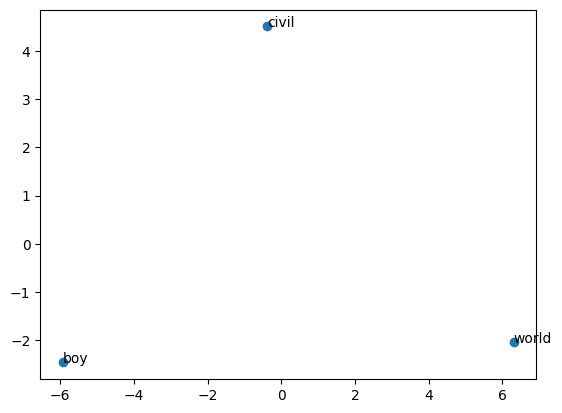

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
words = ['world', 'civil', 'boy']
word_vectors = [model.wv[word] for word in words]
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
from gensim.models import Word2Vec
# example of a word
user_liked_product = 'art'
# Finding similar products
similar_products = model.wv.most_similar(user_liked_product, topn=10)
print(f"Kullanıcı için '{user_liked_product}' ürününe benzer ürünler:")
for product, similarity in similar_products:
   print(f"{product}: Benzerlik Skoru = {similarity}")

Kullanıcı için 'art' ürününe benzer ürünler:
popular: Benzerlik Skoru = 0.8760147094726562
combining: Benzerlik Skoru = 0.8610761761665344
addition: Benzerlik Skoru = 0.8399815559387207
fine: Benzerlik Skoru = 0.8356310725212097
literature: Benzerlik Skoru = 0.8334253430366516
editions: Benzerlik Skoru = 0.8256452679634094
unique: Benzerlik Skoru = 0.8250318169593811
drawing: Benzerlik Skoru = 0.8237888216972351
images: Benzerlik Skoru = 0.8176860809326172
library: Benzerlik Skoru = 0.8172959089279175


In [ ]:
from gensim.models import Word2Vec
corpus = [description.split() for description in df['description']]
# Training Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# Building TF-IDF Word2Vec

# Storing the TFIDF Word2Vec embeddings,for each book description

tfidf_vectors = [];
line = 0;
for desc in corpus:
    sent_vec = np.zeros(300)
    # num of words with a valid vector in the book description
    weight_sum =0;
    # for each word in the book description
    for word in desc:
        if word in similar_products and word in tfidf_feature:
            vec = similar_products[word]
            tf_idf = tfidf_list[word] * (desc.count(word) / len(desc))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    line += 1

In [ ]:
#Recommending top 5 similar books
def recommendations(title):

# Finding cosine similarity for the vectors

cosine_similarities = cosine_similarity(tfidf_vectors,  tfidf_vectors)

# taking the title and book image link
books = df[['title']]
#Reverse mapping of the index
indices = pd.Series(df.index, index = df['title']).drop_duplicates()

    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    for index, row in recommend.iterrows():
plt.title(row['title'])

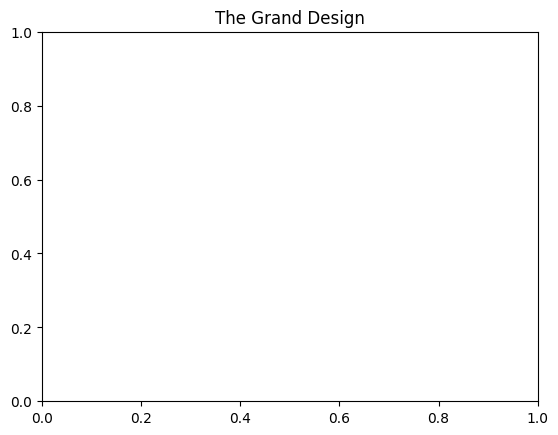

In [ ]:
recommendations("The Da Vinci Code")

In [ ]:
####Karin

from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
def recommend_books(title, df, tfidf_vectors):
# Cosine similarity for the vectors
cosine_similarities = cosine_similarity(tfidf_vectors, tfidf_vectors)
   books = df[['title']]
# Reverse mapping of the index
   indices = pd.Series(df.index, index=df['title']).drop_duplicates()
   idx = indices[title]
# Similarity scores
  sim_scores = list(enumerate(cosine_similarities[idx]))
   sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
# Top 5 similar books
   sim_scores = sim_scores[1:6]
   book_indices = [i[0] for i in sim_scores]
recommendations = books.iloc[book_indices]
return recommendations

recommended_books = recommend_books('The Da Vinci Code', df, tfidf_vectors)
print(recommended_books)

                                     title
1            Underbelly : The Gangland War
2                  A Sir Phillip, Con Amor
3  QI: The Third Book of General Ignorance
4           The Hidden Power of F*cking Up
5                         The Grand Design


In [ ]:
#Using description and category features together to inrease accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
def recommend_books(title, df):
   # Combining 'description' and 'category' into a single column for TF-IDF
   df['combined_features'] = df['description'] + ' ' + df['categories']
   # TF-IDF Vectorization
   tfidf_vectorizer = TfidfVectorizer(stop_words='english')
   tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])
   # Cosine similarity s
   cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
   books = df[['title']]
   indices = pd.Series(df.index, index=df['title']).drop_duplicates()
   idx = indices[title]
   #  similarity scores
   sim_scores = list(enumerate(cosine_similarities[idx]))
   sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   # Top 10 similar books
   sim_scores = sim_scores[1:11]
   book_indices = [i[0] for i in sim_scores]

   recommendations = books.iloc[book_indices]
   return recommendations

recommended_books = recommend_books('The Da Vinci Code', df)
print(recommended_books)

                                                   title
19214               DA Vinci Code, the (Us Ed) : A Novel
19966                                             Origin
22008     The Da Vinci Code: Special Illustrated Edition
21020                                     Absolute Proof
22514        Angels And Demons : The Illustrated Edition
6149                                     The Lost Symbol
10755                                   The Sacred Blood
10543                                Origen (En Espanol)
14797                                      The Art Thief
19544  Code Girls : The True Story of the American Wo...


In [ ]:
#Calculating MAE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
df['combined_features'] = df['description'] + ' ' + df['categories']
df = df.dropna(subset=['rating-avg'])
X = df['combined_features']
y = df['rating-avg']
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Model training
model = LinearRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.7996277319204825
